In [1]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import numpy as np
import pandas as pd


In [5]:
data = pd.read_csv("cricket.csv",sep=",", encoding="ISO-8859-1", header=0)

In [6]:
data.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0  
0  21367  86.23   49  96  20  
1  18048  78.86   25  93  15  
2  17046  80.39   30  82  20  
3  14725  91.20   28  68  34  
4  16020  78.96   19  77  28

In [9]:
# 2. rescaling
rfm_df = data[['SR', 'Ave']]
# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(79, 2)

In [10]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['SR', 'Ave']
rfm_df_scaled.head()

SR       Ave
0  0.703152  1.072294
1 -0.044139  0.587725
2  0.110997  0.596226
3  1.207091 -1.047909
4 -0.034000 -0.876185

In [14]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4,random_state=100)
kmeans.fit(rfm_df_scaled)

KMeans(n_clusters=4, random_state=100)

In [12]:
#help(KMeans)

In [15]:
kmeans.labels_

array([3, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1, 0, 3, 2, 3, 2, 0, 1, 1, 0, 1,
       2, 1, 0, 3, 2, 0, 2, 1, 2, 2, 1, 2, 3, 2, 2, 1, 3, 1, 2, 2, 3, 2,
       2, 2, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 1, 0, 2, 0, 2, 0, 1, 3, 3, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2])

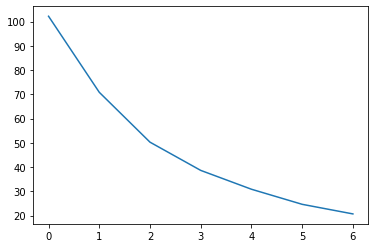

In [17]:
import matplotlib.pyplot as plt

# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [18]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.37632823237612395
For n_clusters=3, the silhouette score is 0.36700102657579503
For n_clusters=4, the silhouette score is 0.3836904829421138
For n_clusters=5, the silhouette score is 0.37140445465078076
For n_clusters=6, the silhouette score is 0.3808970475434973
For n_clusters=7, the silhouette score is 0.3845769766941032
For n_clusters=8, the silhouette score is 0.3462983280677846


In [19]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [20]:
kmeans.labels_

array([3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 3, 1, 3, 1, 2, 0, 0, 2, 0,
       1, 0, 2, 3, 2, 2, 1, 0, 1, 1, 0, 1, 3, 1, 1, 0, 3, 0, 1, 1, 3, 1,
       1, 1, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 3, 3, 0,
       0, 1, 0, 1, 2, 1, 1, 1, 0, 0, 1, 2, 1])

In [22]:
# assign the label
data['cluster_id'] = kmeans.labels_
data.head()

Player       Span  Mat  Inns  NO   Runs    HS    Ave  \
0         SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*  44.83   
1  KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169  41.98   
2         RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164  42.03   
3      ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189  32.36   
4   DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144  33.37   

      BF     SR  100  50   0  cluster_id  
0  21367  86.23   49  96  20           3  
1  18048  78.86   25  93  15           0  
2  17046  80.39   30  82  20           0  
3  14725  91.20   28  68  34           2  
4  16020  78.96   19  77  28           1

In [24]:
data.head(50)

Player       Span  Mat  Inns  NO   Runs    HS  \
0           SR Tendulkar (INDIA)  1989-2012  463   452  41  18426  200*   
1    KC Sangakkara (Asia/ICC/SL)  2000-2015  404   380  41  14234   169   
2           RT Ponting (AUS/ICC)  1995-2012  375   365  39  13704   164   
3        ST Jayasuriya (Asia/SL)  1989-2011  445   433  18  13430   189   
4     DPMD Jayawardene (Asia/SL)  1998-2015  448   418  39  12650   144   
5      Inzamam-ul-Haq (Asia/PAK)  1991-2007  378   350  53  11739  137*   
6         JH Kallis (Afr/ICC/SA)  1996-2014  328   314  53  11579   139   
7        SC Ganguly (Asia/INDIA)  1992-2007  311   300  23  11363   183   
8      R Dravid (Asia/ICC/INDIA)  1996-2011  344   318  40  10889   153   
9               BC Lara (ICC/WI)  1990-2007  299   289  32  10405   169   
10               TM Dilshan (SL)  1999-2016  330   303  41  10290  161*   
11    Mohammad Yousuf (Asia/PAK)  1998-2010  288   273  40   9720  141*   
12        AC Gilchrist (AUS/ICC)  1996-2008  287   279  11   9619   172   
13         MS Dhoni (Asia/INDIA)  2004-2017  295   255  70   9496  183*   
14          M Azharuddin (INDIA)  1985-2000  334   308  54   9378  153*   
15       AB de Villiers (Afr/SA)  2005-2017  222   213  39   9319  162*   
16              PA de Silva (SL)  1984-2003  308   296  30   9284   145   
17             CH Gayle (ICC/WI)  1999-2015  269   264  17   9221   215   
18             Saeed Anwar (PAK)  1989-2003  247   244  19   8824   194   
19            S Chanderpaul (WI)  1994-2011  268   251  40   8778   150   
20     Yuvraj Singh (Asia/INDIA)  2000-2017  304   278  40   8701   150   
21                DL Haynes (WI)  1978-1994  238   237  28   8648  152*   
22              MS Atapattu (SL)  1990-2007  268   259  32   8529  132*   
23                ME Waugh (AUS)  1988-2002  244   236  20   8500   173   
24     V Sehwag (Asia/ICC/INDIA)  1999-2013  251   245   9   8273   219   
25               V Kohli (INDIA)  2008-2017  188   180  29   8146   183   
26                 HH Gibbs (SA)  1996-2010  248   240  16   8094   175   
27  Shahid Afridi (Asia/ICC/PAK)  1996-2015  398   369  27   8064   124   
28           SP Fleming (ICC/NZ)  1994-2007  280   269  21   8037  134*   
29               MJ Clarke (AUS)  2003-2015  245   223  44   7981   130   
30                SR Waugh (AUS)  1986-2002  325   288  58   7569  120*   
31              A Ranatunga (SL)  1982-1999  269   255  47   7456  131*   
32           Javed Miandad (PAK)  1975-1996  233   218  41   7381  119*   
33             Younis Khan (PAK)  2000-2015  265   255  23   7249   144   
34                  HM Amla (SA)  2008-2017  156   153  10   7186   159   
35            Saleem Malik (PAK)  1982-1999  283   256  38   7170   102   
36                 NJ Astle (NZ)  1995-2007  223   217  14   7090  145*   
37             GC Smith (Afr/SA)  2002-2013  197   194  10   6989   141   
38                MG Bevan (AUS)  1994-2004  232   196  67   6912  108*   
39                G Kirsten (SA)  1993-2003  185   185  19   6798  188*   
40                A Flower (ZIM)  1992-2003  213   208  16   6786   145   
41            Shoaib Malik (PAK)  1999-2017  252   228  36   6765   143   
42             IVA Richards (WI)  1975-1991  187   167  24   6721  189*   
43               GW Flower (ZIM)  1992-2010  221   214  18   6571  142*   
44              Ijaz Ahmed (PAK)  1986-2000  250   232  29   6564  139*   
45               AR Border (AUS)  1979-1994  273   252  39   6524  127*   
46              LRPL Taylor (NZ)  2006-2017  190   176  29   6486  131*   
47            RB Richardson (WI)  1983-1996  224   217  30   6248   122   
48         WU Tharanga (Asia/SL)  2005-2017  204   193  14   6140  174*   
49           ML Hayden (AUS/ICC)  1993-2008  161   155  15   6133  181*   

      Ave     BF      SR  100  50   0  cluster_id  
0   44.83  21367   86.23   49  96  20           3  
1   41.98  18048   78.86   25  93  15           0  
2   42.03  17046   80.39   30  82  20       

<AxesSubplot:xlabel='cluster_id', ylabel='SR'>

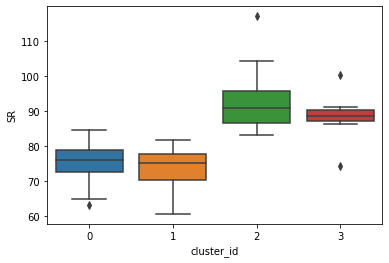

In [27]:
# plot
import seaborn as sns

sns.boxplot(x='cluster_id', y='SR', data=data)

<AxesSubplot:xlabel='cluster_id', ylabel='Ave'>

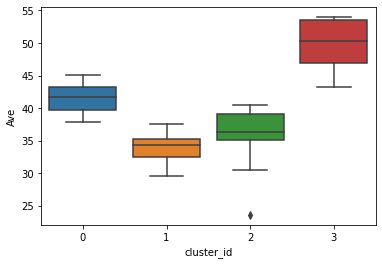

In [28]:
sns.boxplot(x='cluster_id', y='Ave', data=data)